# Notebook Breakdown

Airbnb NYC data which contains activities of visitors and i wanna predict price for home stay or tourism
according to given features

## Problem Statement

statistical analysis to take a look the feature relationship

exploratory analysis of data

story telling with visualization

make regression model to predict the price for particular home/apt


## Loading Data

In [1]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly
from plotly import tools
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv') ## load dataset

In [3]:
df.head() ##sample dataset

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.describe().T    ## basic information about dataset

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

#### Here we have some statistical calculation of our dataset of different features ,like mean, values of std, min , max and the quartile values

In [5]:
## creating table of freuency through plotly 
cat = ff.create_table(df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(cat)

#### Here I have another describe funtion which is used for object type particularly with frequency table and its for unique values of the features and it also observed the top values with frequency  

## Data Wrangling

In [6]:
df.info() ## dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

#### So in this section we have the concise summary of airbnb dataset . we have data type , memory usage of our feature and also we can see the null values that present in our data set. 

In [7]:
df.shape

(48895, 16)

#### after take a look on shape of the data ,we can say that we have  plenty of data to exploration of the data.

In [8]:
df.isnull().sum() ## checking for null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### in the case of missing values i don't think that we have to use any special treatment on this dataset the name , hostid and host name are irrelavent so we can remove easily and the in case of reviews ,so we can impute them with 0

In [9]:
df.columns ## columns present in dataset

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df.drop(['id','name','host_id','host_name','last_review'], inplace=True , axis=1) ## droping features

In [11]:
df.room_type.unique() ##checking for unique values in the feature

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### we have three types of unique rooms that are private,shared & apartment

In [12]:
df.neighbourhood.nunique()

221

#### there are 221 types of unique locations mentions in the dataset 

In [13]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### five areas present in the data which contain the location that mention above

In [14]:
cont = pd.crosstab(df.neighbourhood_group, df.room_type)
cont

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9

####   here i am trying to analyze relationship between two features that are area and room with the help of crosstab which is also known as second type of chi square test (independece of variable)

# Contingency Table

In [15]:
contt = ff.create_table(pd.crosstab(df.neighbourhood, df.room_type), index=True)
iplot(contt)

### i have created a table with crosstab just for check all the values that we have because its pretty easy to access 

In [16]:
df.reviews_per_month.fillna(0,inplace=True)

## Data Exploration(Statistics) & Visualization

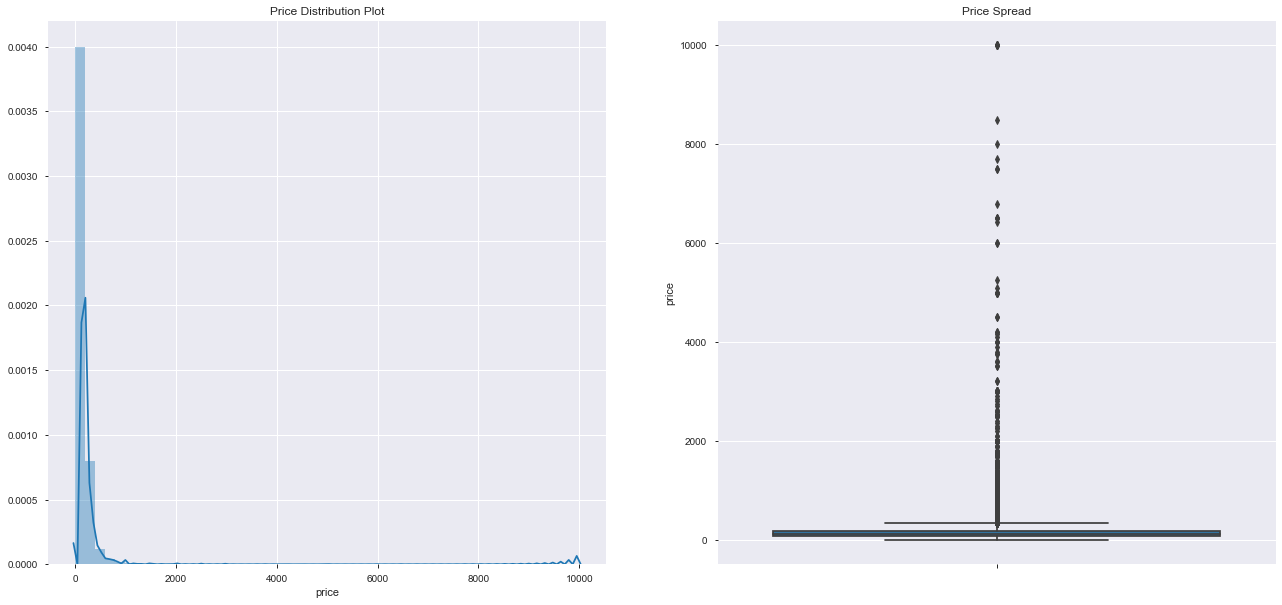

In [17]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.price)

plt.show()

#### when i talk about the distribution so its used for to check whether data is positive skewed or negative so after the implementation i observed that graph of price distribution is positive skewed , And other hand when i check out the boxplot so i observed that here we the outliers and further we will take a look by using some other statistics stuff.

In [18]:
from scipy import stats
z = np.abs(stats.zscore(df['price']))
print(z)

[0.01549307 0.30097355 0.01132904 ... 0.15707024 0.4069123  0.2611711 ]


In [19]:
threshold = 3
print(np.where(z > 3))

(array([  496,   762,   946,  1105,  1414,  1480,  1553,  1862,  1899,
        2018,  2040,  2155,  2215,  2236,  2355,  2386,  2520,  2523,
        2698,  2772,  2896,  3131,  3306,  3333,  3345,  3420,  3537,
        3575,  3594,  3598,  3622,  3636,  3637,  3670,  3684,  3689,
        3695,  3700,  3702,  3720,  3721,  3723,  3727,  3730,  3731,
        3732,  3755,  3758,  3761,  3774,  3782,  3784,  3785,  3788,
        3793,  3804,  3812,  3813,  3817,  4127,  4345,  4376,  4377,
        4482,  4730,  5432,  5499,  5756,  5801,  5839,  5861,  5942,
        5956,  6277,  6333,  6397,  6501,  6511,  6530,  6620,  6715,
        6987,  7088,  7096,  7190,  7477,  7485,  7513,  7541,  7846,
        7982,  8522,  8530,  8727,  8805,  8915,  9035,  9092,  9151,
        9603,  9883, 10333, 10341, 10431, 10520, 11021, 11239, 11264,
       11339, 11369, 11394, 11560, 12329, 12342, 12740, 12800, 12846,
       12878, 13724, 13788, 13930, 14166, 14380, 14385, 14459, 14573,
       14574, 14629

In [20]:
from scipy.stats import skew
print(skew(df.price))

19.118352459553982


#### so for the skewness of the price i have used the absolute values of z score and after set the threshhold as 3 it means that above the value of 3 all the values will considered as outlier  and then i have used the skew function to check the skewness of price data

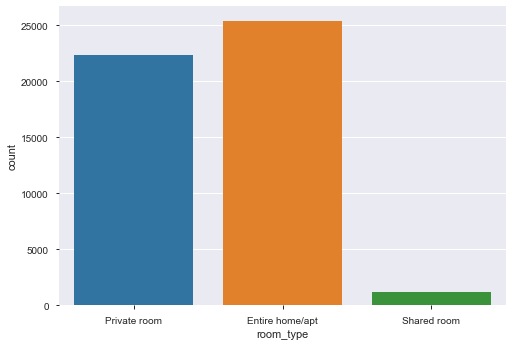

In [21]:
sns.countplot(df.room_type)

#### As we can ,there three type of room in the data that are private,shared and the apartment ,by the countplot number of apt/room is higher than the other, so we can see families are more interested to visit than the other. 

In [22]:
import plotly.express as px

fig = px.violin(df, y="price", x="neighbourhood_group", points="all")
fig.show()

#### Violin plot is the combination of the boxplot and the density plot which can tell us the spread of the data with outlier analysis and by this observation we can say the manhattan is most visited place.

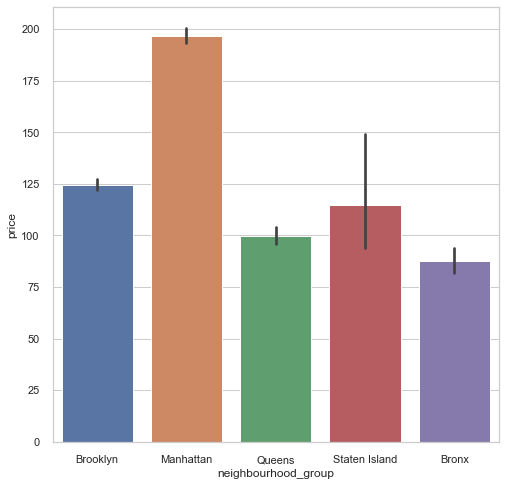

In [23]:
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")

ax = sns.barplot(x="neighbourhood_group", y="price",data=df)

#### Price are high for manhattan area .

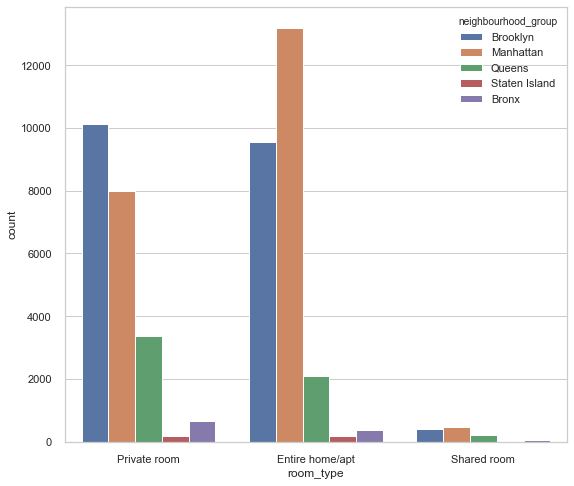

In [24]:
plt.figure(figsize=(9,8))
sns.set(style="whitegrid")

ax = sns.countplot(x="room_type", hue="neighbourhood_group",data=df)

21.826604907169408


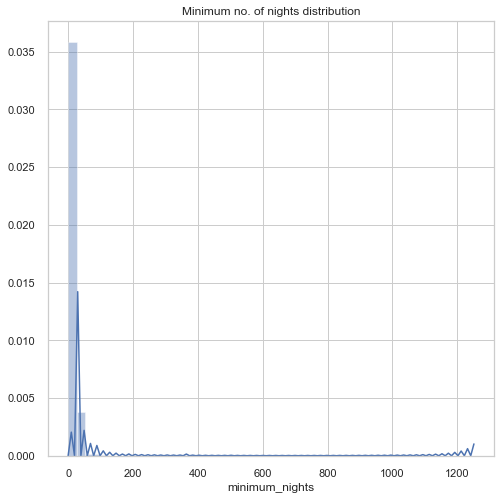

In [25]:
print(skew(df.minimum_nights))
plt.figure(figsize=(8,8))
sns.distplot(df.minimum_nights)
plt.title('Minimum no. of nights distribution')
plt.show()

### so the data observed that seems positive skewed

In [26]:
brook = df[df.neighbourhood_group=="Brooklyn"].availability_365
queen = df[df.neighbourhood_group=="Queens"].availability_365
manh = df[df.neighbourhood_group=="Manhattan"].availability_365
island = df[df.neighbourhood_group=="Staten Island"].availability_365
bronx = df[df.neighbourhood_group=="Bronx"].availability_365

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=brook, name='Brooklyn'))
fig.add_trace(go.Box(x=queen, name='Queens'))
fig.add_trace(go.Box(x=manh, name='Manhattan'))
fig.add_trace(go.Box(x=island, name='Staten Island'))
fig.add_trace(go.Box(x=bronx, name='Bronx'))

fig.show()

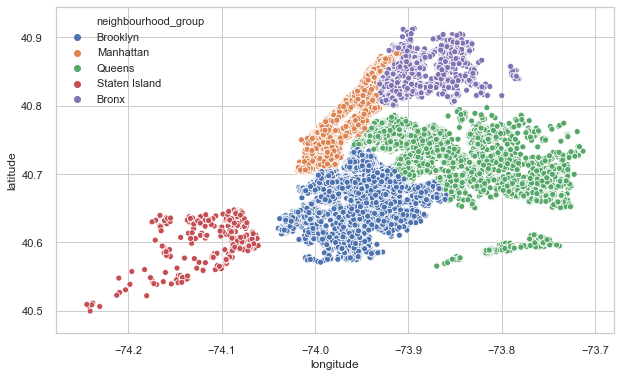

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

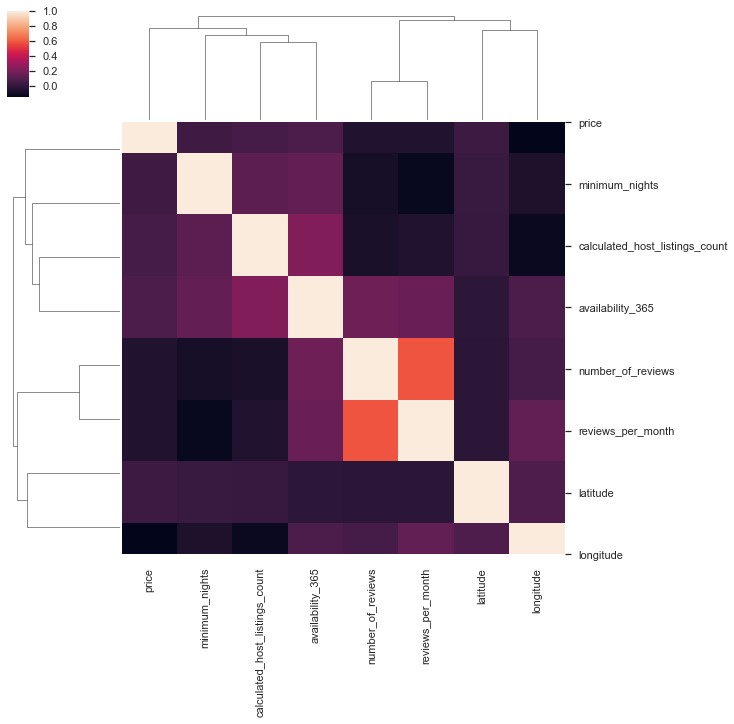

In [28]:
sns.clustermap(df.corr(),annot = False);

Text(0.5, 0.98, ' Attributes distribution based on location')

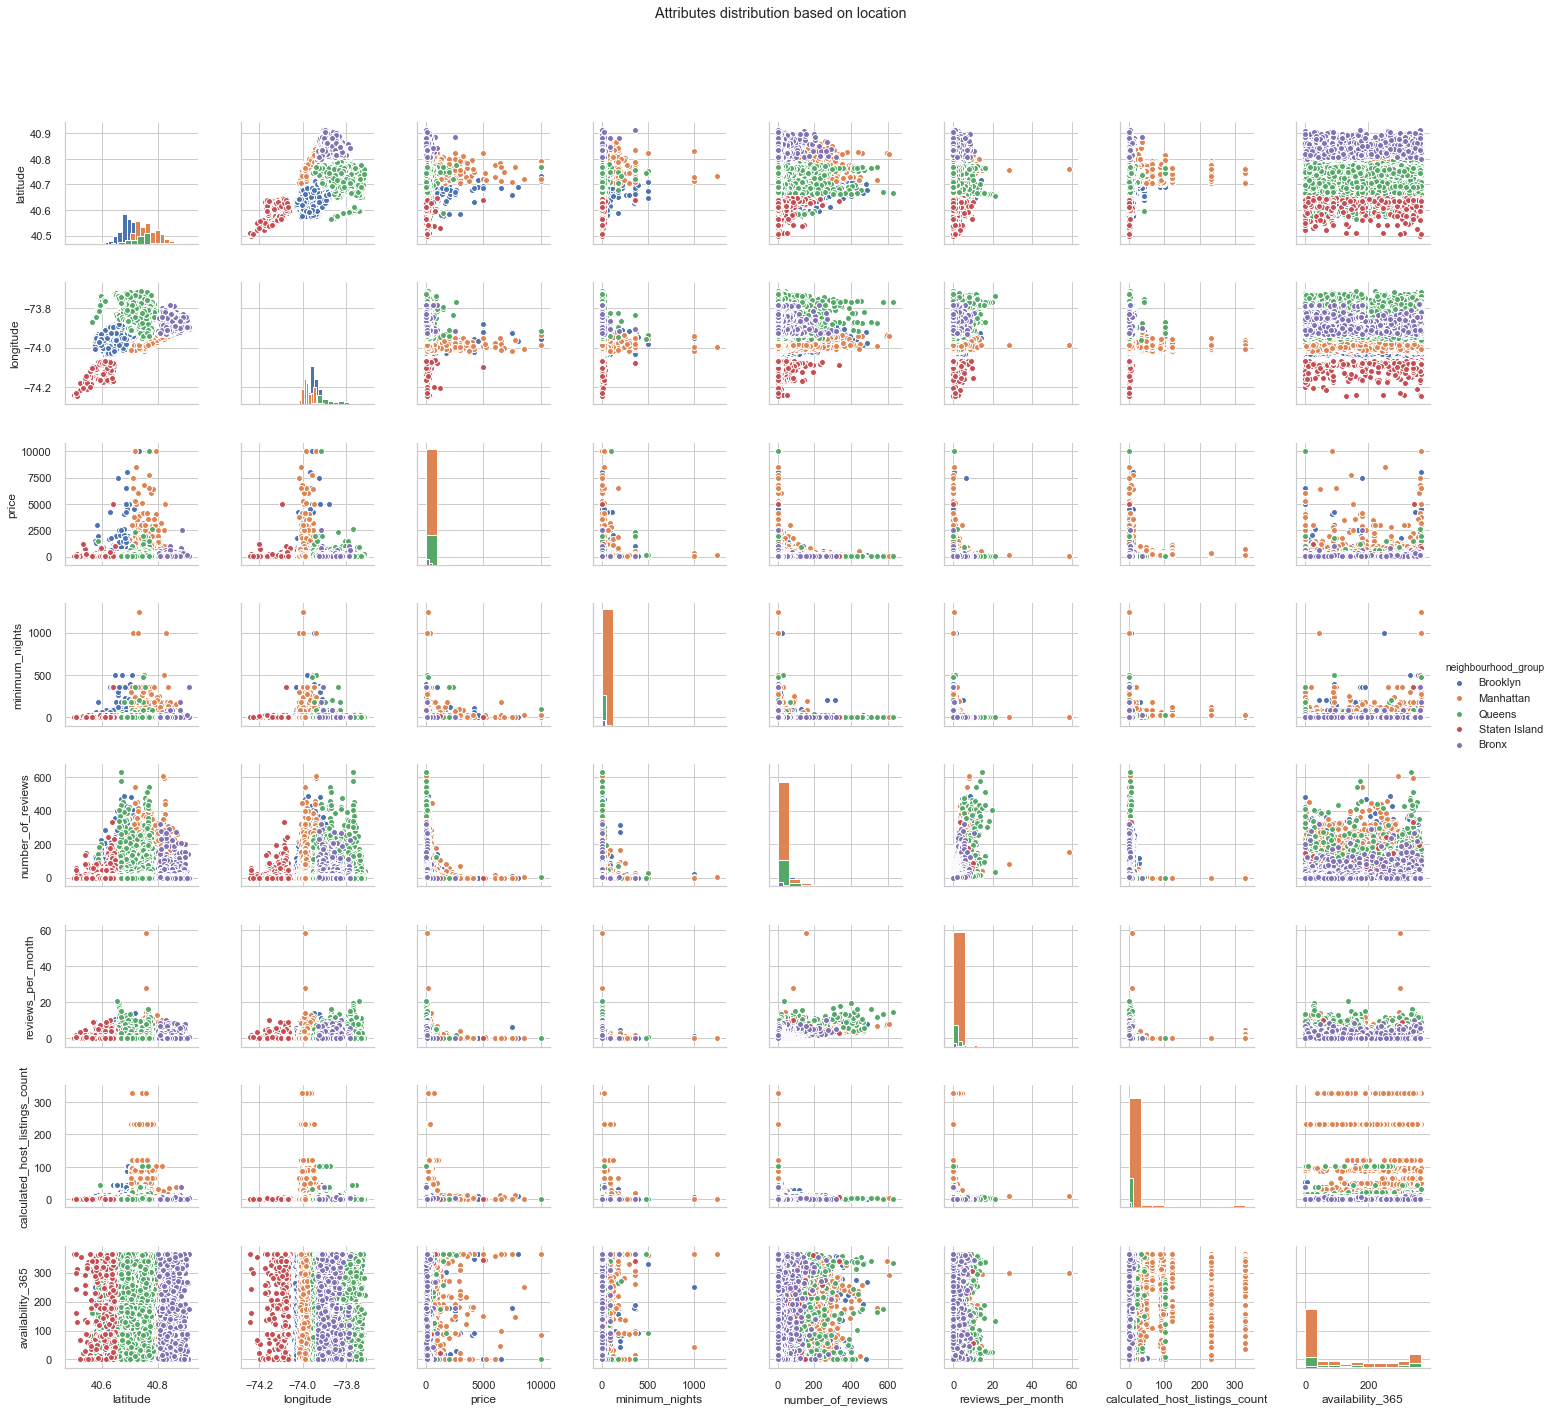

In [29]:
g = sns.PairGrid(df, hue='neighbourhood_group')
g.map_diag(plt.hist,edgecolor = 'w')
g.map_offdiag(plt.scatter,edgecolor = 'w')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle(' Attributes distribution based on location')

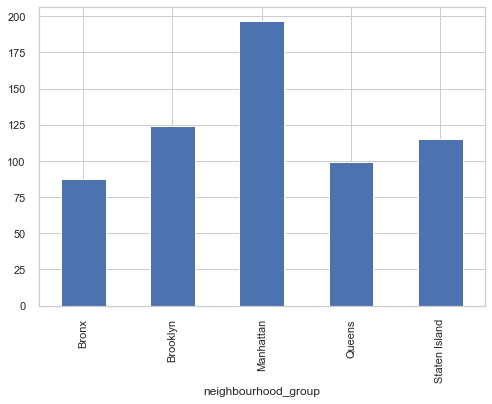

In [30]:
avg_price = df.groupby(['neighbourhood_group'])['price'].mean().plot(kind='bar')

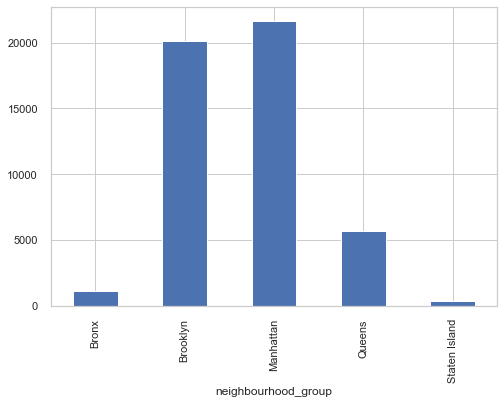

In [31]:
df.groupby(['neighbourhood_group'])['minimum_nights'].count().plot(kind='bar')

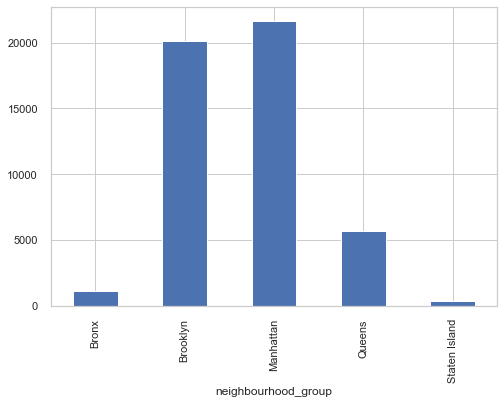

In [32]:
avg_price = df.groupby(['neighbourhood_group'])['availability_365'].count().plot(kind='bar')                       

## Encoding

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])

le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

# Model Building

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()

In [35]:
X = df.drop(['price'], inplace=False, axis=1)
y = df['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model=lm.fit(X_train, y_train)

#### spliting the data for traing and testing and fit the model

In [37]:
lm.intercept_

-48061.31909085646

In [38]:
predictions = lm.predict(X_test)

In [39]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 77.75626894426226
MSE (Mean Squared Error): 57997.50213309369
RMSE (Root mean squared error): 240.82670560611356
R2 score: 0.09146325910478115


In [40]:
from sklearn.model_selection import cross_val_score
mse_ng=cross_val_score(lm,X,y,scoring='neg_mean_squared_error',cv=5)
mse_ng
mean_mse=np.mean(mse_ng)
print(mean_mse)

-52627.756256886954


Text(0.5, 1.0, 'Model prediction')

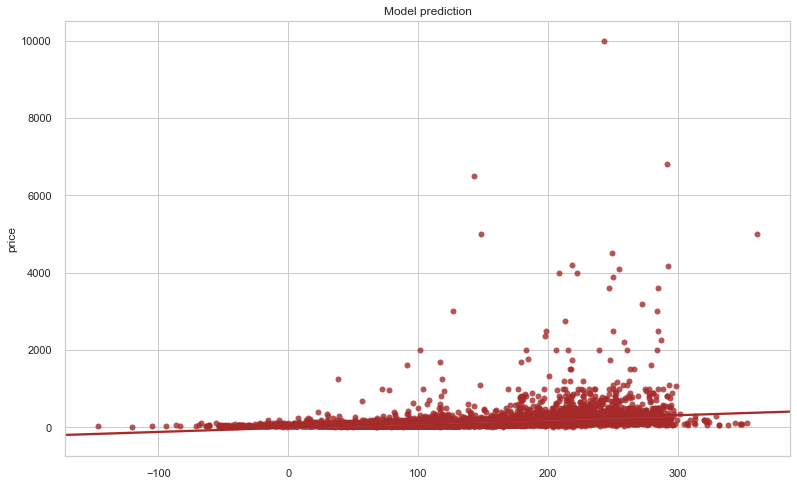

In [41]:
plt.figure(figsize=(13,8))
sns.regplot(y=y_test, x=predictions, color='brown')
plt.title('Model prediction')

In [42]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

Actual Values  Predicted Values
0             99         91.048657
1             40         35.378529
2            149        182.093505
3             80        111.832585
4             95        210.761890
5            800        226.742983
6            300        157.569009
7            250        217.947614
8            150        201.602458
9             48         53.224825

## Recursive Feature Elimination
method to select top k features

In [43]:
from sklearn.feature_selection import RFE

In [44]:
lr2 = LinearRegression()

In [45]:
rfe_selector = RFE(lr2, 8, verbose=True)

In [46]:
rfe_selector.fit(X_train, y_train)

Fitting estimator with 10 features.
Fitting estimator with 9 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=True)

In [47]:
rfe_selector.support_

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True])

In [48]:
rfe_selector.ranking_

array([1, 2, 1, 1, 1, 3, 1, 1, 1, 1])

In [49]:
cols_keep = X_train.columns[rfe_selector.support_]

In [50]:
cols_keep

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [51]:
lr2 = LinearRegression()

In [52]:
lr2.fit(X_train[cols_keep],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_train_pred = lr2.predict(X_train[cols_keep])

In [54]:
r3= metrics.r2_score(y_train, y_train_pred)
r3

0.08909017320945212

## Ridge & Lasso Regression

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [56]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-52627.75562195637


In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-52627.75625688695


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

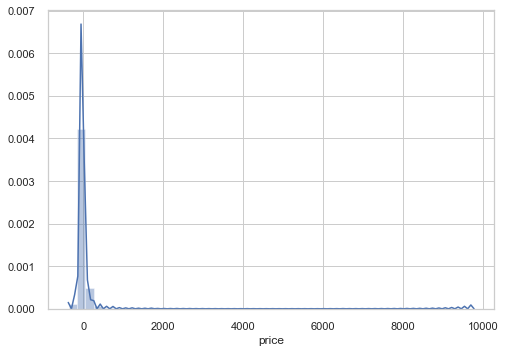

In [60]:
sns.distplot(y_test-prediction_lasso)

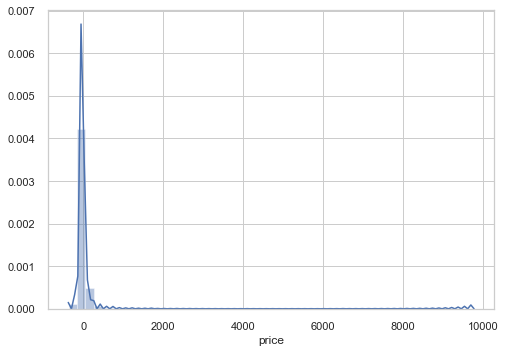

In [61]:
sns.distplot(y_test-prediction_ridge)

In [62]:
import pickle

In [63]:
pickle.dump(lm,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [64]:
from flask import Flask,request,jsonify,render_template

In [ ]:
from flask import Flask,request,jsonify,render_template
app=Flask(__name__)
model=pickle.load(open('model.pkl','rb'))
debug=True
@app.route('/')
def home():
    #return render_template('index')
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    print(request.form)
    int_features=[int(x) for x in request.form.values()]
    final_features=[np.array(int_features)]
    prediction=model.predict(final_features)
    
    output=prediction[0]
    
    #return render_template('index',prediction_text='Marketimg Team Needs To contact this person by this strategy {}'.format(output))
    return render_template('index.html',prediction_text='predicted price {}'.format(output))

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
